In [49]:
import os
root = 'logs/'
algos = ['a2c', 'acktr', 'ppo']
games = ['beamrider', 'breakout', 'qbert']
numTrials = 5

In [50]:
def getLogFileNames(trialName):
    folderPath = root + trialName
    logFileNames = [fileName for fileName in os.listdir(folderPath) if 'monitor' in fileName]
    return folderPath, logFileNames

In [63]:
trialNames = []
for algo in algos:
    for game in games:
        for trialNum in range(1, numTrials + 1):
            trialStr = str(trialNum)
            trialName = algo + '_' + game + '_' + trialStr
            trialNames.append(trialName)

In [99]:
def getTrialStats(trialName):
    folderPath, logFileNames = getLogFileNames(trialName)
    #print(folderPath)
    
    logs = []
    for fileName in logFileNames:
        filePath = folderPath + '/' + fileName
        log_lines = []
        with open(filePath, 'r') as log_file:
            log_lines = log_file.readlines()
        logs.append(log_lines[2:])
        
    #print(logs[0][7])

    numProcesses = len(logs)
    timeSteps = []
    rewards = []
    for log in logs:
        curTimeStep = 0
        for line in log:
            lineParts = line.split(',')
            episodeReward = float(lineParts[0])
            episodeSteps = int(lineParts[1])
            episodeTime = float(lineParts[2])
            curTimeStep += episodeSteps * numProcesses
            timeSteps.append(curTimeStep)
            rewards.append(episodeReward)

    return timeSteps, rewards

C:\Users\mattg\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if sys.path[0] == '':


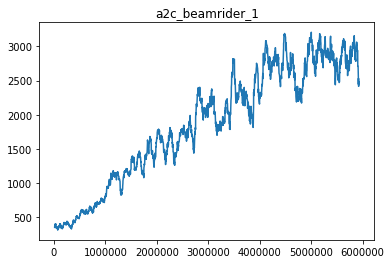

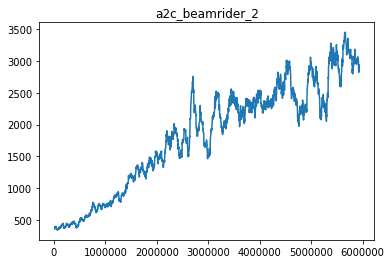

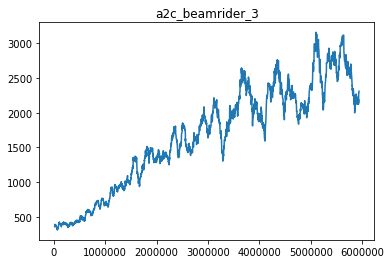

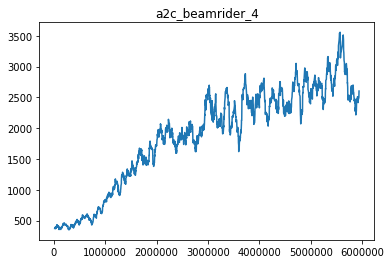

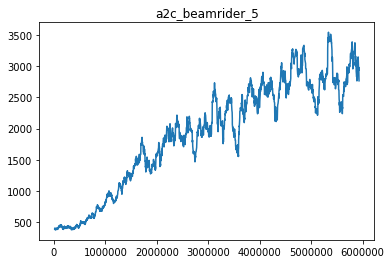

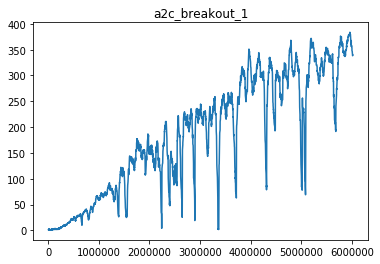

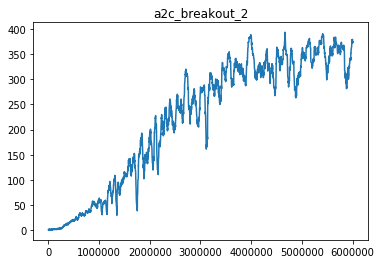

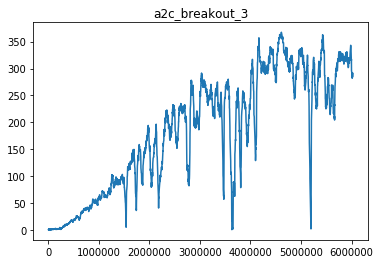

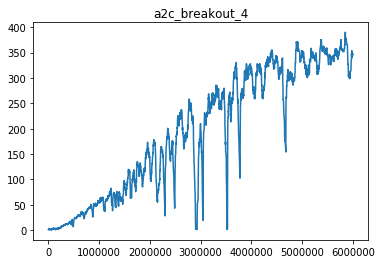

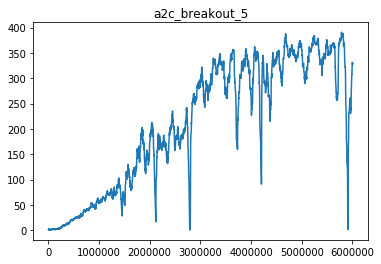

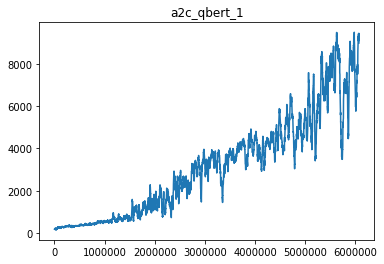

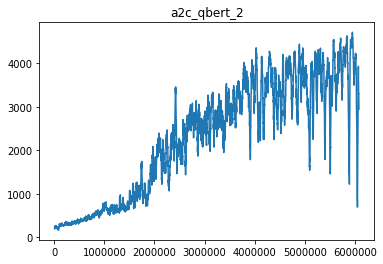

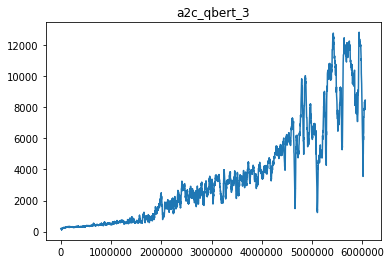

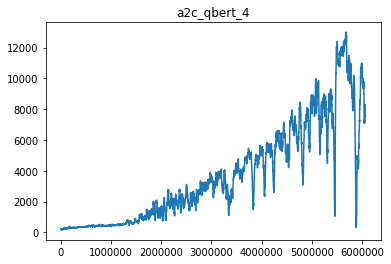

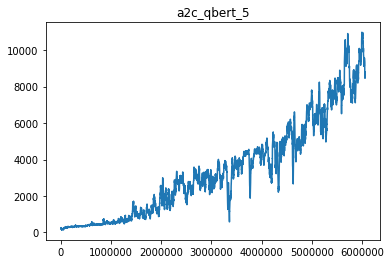

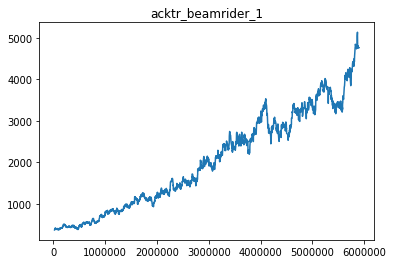

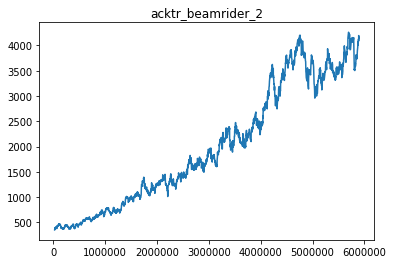

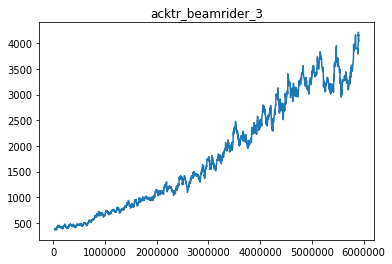

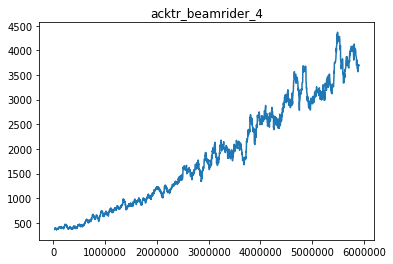

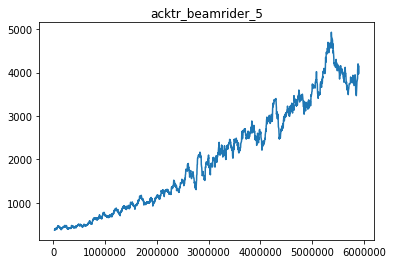

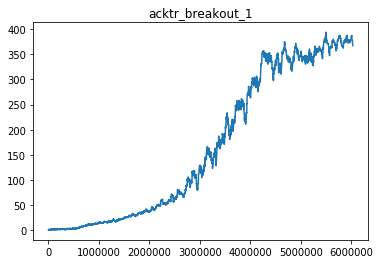

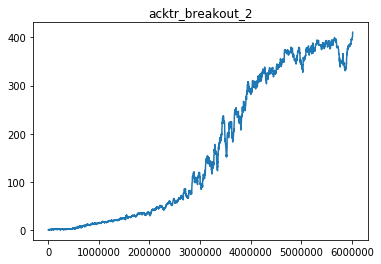

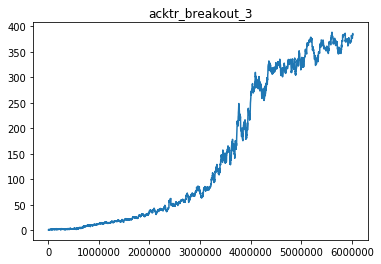

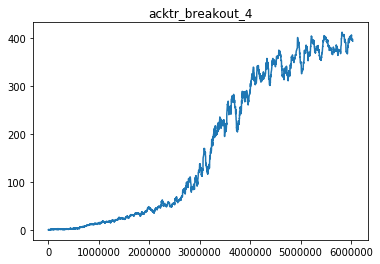

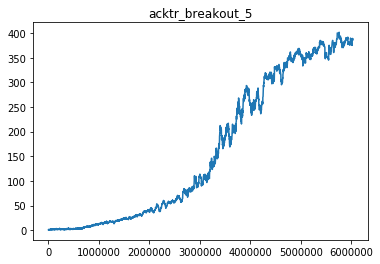

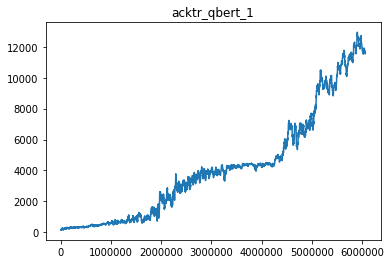

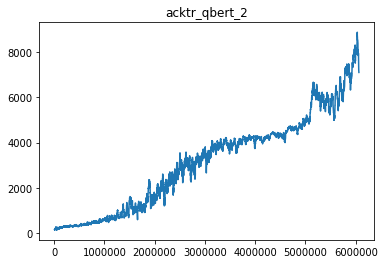

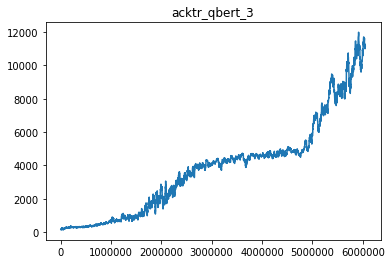

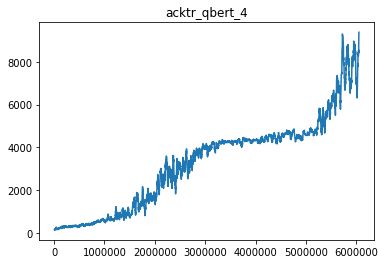

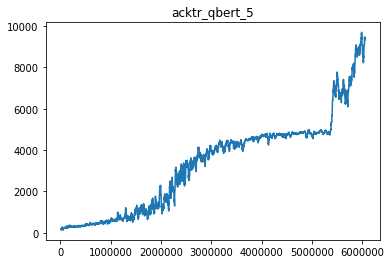

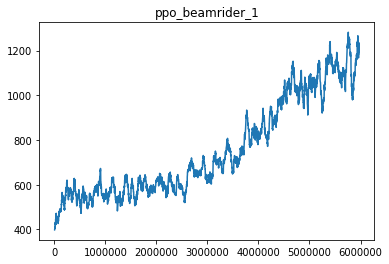

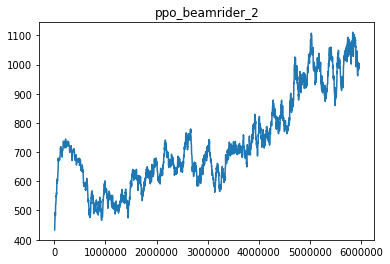

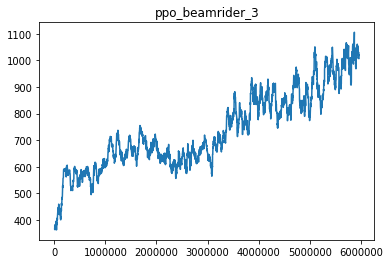

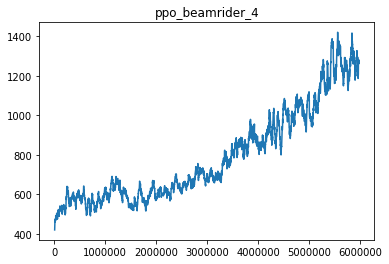

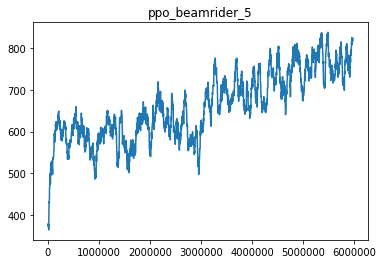

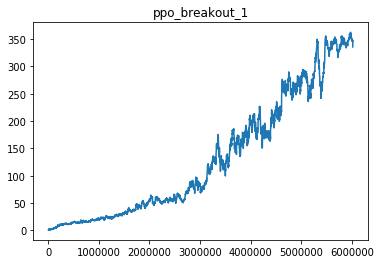

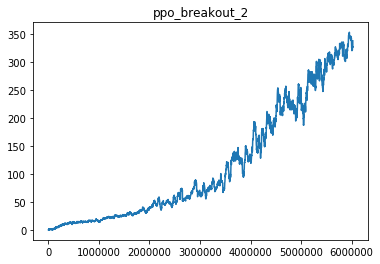

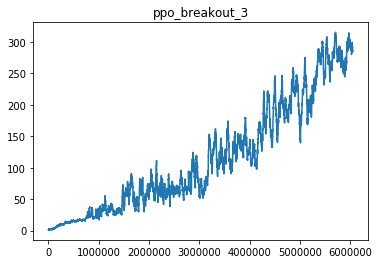

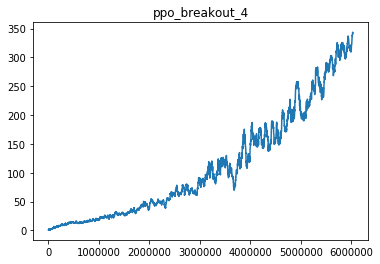

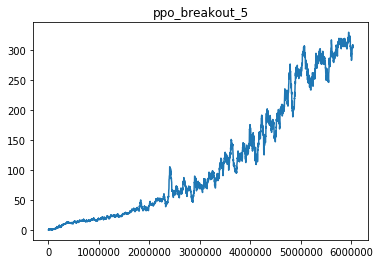

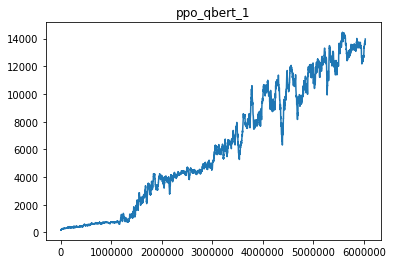

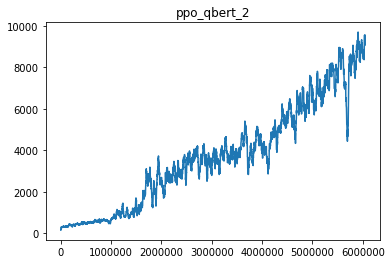

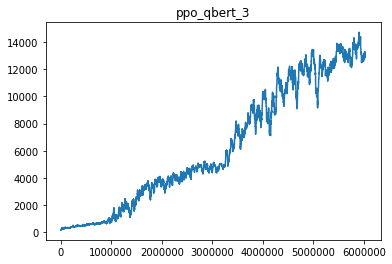

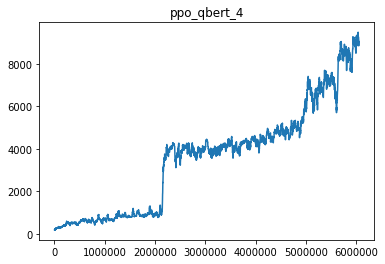

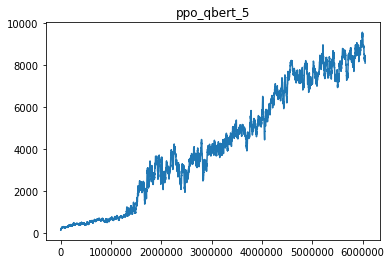

In [100]:
import matplotlib.pyplot as plt
import numpy

def running_mean(x, N):
    cumsum = numpy.cumsum(numpy.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / float(N)

for i, trialName in enumerate(trialNames):
    times, rewards = getTrialStats(trialName)
    times, rewards = zip(*sorted(zip(times, rewards)))
    rewards = running_mean(numpy.array(rewards), 32)
    plt.figure(i)
    plt.title(trialName)
    plt.plot(times[:-31], rewards)
plt.show()